# Exercises - Time Series

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as nd

In [2]:
from vega_datasets import data

In [5]:
from debug import local_settings, timeifdebug, timeargsifdebug, frame_splain

In [169]:
def ifull(obj):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        display(obj)

```python
from vega_datasets import data
data.sf_temps()
```

#### Use the above dataset for the exercises below:

In [6]:
sft = data.sf_temps()
frame_splain(sft, splain=True)

DATAFRAME SHAPE:
(8759, 2) 

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
temp    8759 non-null float64
date    8759 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 136.9 KB
None 

DATAFRAME DESCRIPTION:
       count       mean       std   min   25%   50%   75%   max
temp  8759.0  56.924112  6.107079  45.6  52.3  56.5  60.7  72.2 

DATAFRAME HEAD:
   temp                date
0  47.8 2010-01-01 00:00:00
1  47.4 2010-01-01 01:00:00
2  46.9 2010-01-01 02:00:00
3  46.5 2010-01-01 03:00:00
4  46.0 2010-01-01 04:00:00 



1. Resample by the day and take the average temperature. Visualize the average
   temperature over time.

In [25]:
sftd = (sft
        .set_index('date')
        .resample('d')
        .count()
        .rename(columns={'temp': 'readings'})
        .join((
            sft
            .set_index('date')
            .resample('d')
            .mean()
            .rename(columns={'temp': 'temp_mean'})
            )
        )
       )
frame_splain(sftd, splain=True)
sftd

DATAFRAME SHAPE:
(365, 2) 

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2010-01-01 to 2010-12-31
Freq: D
Data columns (total 2 columns):
readings     365 non-null int64
temp_mean    365 non-null float64
dtypes: float64(1), int64(1)
memory usage: 18.6 KB
None 

DATAFRAME DESCRIPTION:
           count       mean       std        min        25%        50%  \
readings   365.0  23.997260  0.052342  23.000000  24.000000  24.000000   
temp_mean  365.0  56.923809  4.507912  48.991667  52.929167  57.191667   

                 75%        max  
readings   24.000000  24.000000  
temp_mean  61.583333  63.129167   

DATAFRAME HEAD:
            readings  temp_mean
date                           
2010-01-01        24  49.170833
2010-01-02        24  49.304167
2010-01-03        24  49.391667
2010-01-04        24  49.445833
2010-01-05        24  49.491667 



,readings,temp_mean
date,,
2010-01-01,24,49.170833
2010-01-02,24,49.304167
2010-01-03,24,49.391667
2010-01-04,24,49.445833
2010-01-05,24,49.491667
2010-01-06,24,49.529167
2010-01-07,24,49.466667
2010-01-08,24,49.475000
2010-01-09,24,49.537500


2. Write the code necessary to visualize the minimum temperature over time.

In [26]:
sftd = (sftd
        .join((
            sft
            .set_index('date')
            .resample('d')
            .min()
            .rename(columns={'temp': 'temp_lo'})
            )
        )
       )
frame_splain(sftd, splain=True)
sftd

DATAFRAME SHAPE:
(365, 3) 

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2010-01-01 to 2010-12-31
Freq: D
Data columns (total 3 columns):
readings     365 non-null int64
temp_mean    365 non-null float64
temp_lo      365 non-null float64
dtypes: float64(2), int64(1)
memory usage: 21.4 KB
None 

DATAFRAME DESCRIPTION:
           count       mean       std        min        25%        50%  \
readings   365.0  23.997260  0.052342  23.000000  24.000000  24.000000   
temp_mean  365.0  56.923809  4.507912  48.991667  52.929167  57.191667   
temp_lo    365.0  51.973151  3.780828  45.600000  48.800000  51.900000   

                 75%        max  
readings   24.000000  24.000000  
temp_mean  61.583333  63.129167  
temp_lo    55.600000  57.300000   

DATAFRAME HEAD:
            readings  temp_mean  temp_lo
date                                    
2010-01-01        24  49.170833     45.8
2010-01-02        24  49.304167     46.0
2010-01-03        24  49.3916

,readings,temp_mean,temp_lo
date,,,
2010-01-01,24,49.170833,45.8
2010-01-02,24,49.304167,46.0
2010-01-03,24,49.391667,46.1
2010-01-04,24,49.445833,46.1
2010-01-05,24,49.491667,46.1
2010-01-06,24,49.529167,46.1
2010-01-07,24,49.466667,46.0
2010-01-08,24,49.475000,46.0
2010-01-09,24,49.537500,46.0


3. Write the code necessary to visualize the maximum temperature over time.

In [27]:
sftd = (sftd
        .join((
            sft
            .set_index('date')
            .resample('d')
            .max()
            .rename(columns={'temp': 'temp_hi'})
            )
        )
       )
frame_splain(sftd, splain=True)
sftd

DATAFRAME SHAPE:
(365, 4) 

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2010-01-01 to 2010-12-31
Freq: D
Data columns (total 4 columns):
readings     365 non-null int64
temp_mean    365 non-null float64
temp_lo      365 non-null float64
temp_hi      365 non-null float64
dtypes: float64(3), int64(1)
memory usage: 24.3 KB
None 

DATAFRAME DESCRIPTION:
           count       mean       std        min        25%        50%  \
readings   365.0  23.997260  0.052342  23.000000  24.000000  24.000000   
temp_mean  365.0  56.923809  4.507912  48.991667  52.929167  57.191667   
temp_lo    365.0  51.973151  3.780828  45.600000  48.800000  51.900000   
temp_hi    365.0  63.791233  5.989155  53.200000  58.400000  64.500000   

                 75%        max  
readings   24.000000  24.000000  
temp_mean  61.583333  63.129167  
temp_lo    55.600000  57.300000  
temp_hi    69.800000  72.200000   

DATAFRAME HEAD:
            readings  temp_mean  temp_lo  temp_hi
d

,readings,temp_mean,temp_lo,temp_hi
date,,,,
2010-01-01,24,49.170833,45.8,53.3
2010-01-02,24,49.304167,46.0,53.4
2010-01-03,24,49.391667,46.1,53.5
2010-01-04,24,49.445833,46.1,53.6
2010-01-05,24,49.491667,46.1,53.8
2010-01-06,24,49.529167,46.1,53.8
2010-01-07,24,49.466667,46.0,53.8
2010-01-08,24,49.475000,46.0,53.9
2010-01-09,24,49.537500,46.0,54.0


4. Which month is the coldest, on average?

In [30]:
sftm = (sft
        .set_index('date')
        .resample('M')
        .count()
        .rename(columns={'temp': 'readings'})
        .join((
            sft
            .set_index('date')
            .resample('M')
            .mean()
            .rename(columns={'temp': 'temp_mean'})
            )
        )
       )
frame_splain(sftm, splain=True)


DATAFRAME SHAPE:
(12, 2) 

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2010-01-31 to 2010-12-31
Freq: M
Data columns (total 2 columns):
readings     12 non-null int64
temp_mean    12 non-null float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes
None 

DATAFRAME DESCRIPTION:
           count        mean        std        min        25%         50%  \
readings    12.0  729.916667  21.551032  672.00000  720.00000  743.500000   
temp_mean   12.0   56.902309   4.610790   49.98414   53.52837   56.802012   

                  75%         max  
readings   744.000000  744.000000  
temp_mean   60.774906   62.487083   

DATAFRAME HEAD:
            readings  temp_mean
date                           
2010-01-31       744  49.984140
2010-02-28       672  52.243899
2010-03-31       743  53.956528
2010-04-30       720  55.633056
2010-05-31       744  57.970968 



In [31]:
min_mean = sftm.temp_mean.min()
sftm[sftm.temp_mean == min_mean]

,readings,temp_mean
date,,
2010-01-31,744,49.98414


5. Which month has the highest average temperature?

In [33]:
max_mean = sftm.temp_mean.max()
sftm[sftm.temp_mean == max_mean]

,readings,temp_mean
date,,
2010-09-30,720,62.487083


6. Resample by the day and calculate the min and max temp for the day (Hint:
   `.agg(['min', 'max'])`). Use this resampled dataframe to calculate the change
   in temperature for the day. Which month has the highest daily temperature
   variability?


In [35]:
sftd['temp_range'] = sftd['temp_hi'] - sftd.temp_lo
sftd

,readings,temp_mean,temp_lo,temp_hi,temp_range
date,,,,,
2010-01-01,24,49.170833,45.8,53.3,7.5
2010-01-02,24,49.304167,46.0,53.4,7.4
2010-01-03,24,49.391667,46.1,53.5,7.4
2010-01-04,24,49.445833,46.1,53.6,7.5
2010-01-05,24,49.491667,46.1,53.8,7.7
2010-01-06,24,49.529167,46.1,53.8,7.7
2010-01-07,24,49.466667,46.0,53.8,7.8
2010-01-08,24,49.475000,46.0,53.9,7.9
2010-01-09,24,49.537500,46.0,54.0,8.0


7. **Bonus**: Visualize the daily min, average, and max temperature over time on a
   single line plot, i.e. the min, average, and maximum temperature should be 3
   seperate lines.

<Figure size 576x504 with 0 Axes>

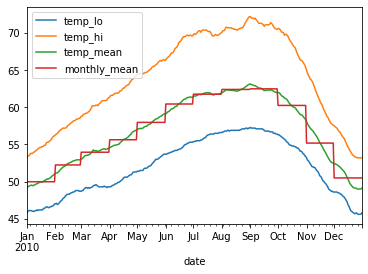

In [51]:
plt.figure(figsize=(8,7))
(sftd[['temp_lo', 'temp_hi', 'temp_mean']]
 .join((sft
        .set_index('date')
        .resample('M')
        .transform('mean')
        .rename(columns={'temp':'monthly_mean'})))
).plot()
plt.show()

```python
from vega_datasets import data
data.seattle_weather()
```

#### Use the dataset to answer the following questions:

In [211]:
seawx=data.seattle_weather().set_index('date')
seawx=seawx.rename(columns={'precipitation': 'precip', 'temp_max': 'daily_hi', 'temp_min': 'daily_lo'})
seawx['rainy'] = (seawx.precip > 0) & (seawx.daily_hi > 0) & (seawx.weather != 'snow')
frame_splain(seawx, splain=True)
seawx.head(15)

DATAFRAME SHAPE:
(1461, 6) 

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2012-01-01 to 2015-12-31
Data columns (total 6 columns):
precip      1461 non-null float64
daily_hi    1461 non-null float64
daily_lo    1461 non-null float64
wind        1461 non-null float64
weather     1461 non-null object
rainy       1461 non-null bool
dtypes: bool(1), float64(4), object(1)
memory usage: 69.9+ KB
None 

DATAFRAME DESCRIPTION:
           count       mean       std  min   25%   50%   75%   max
precip    1461.0   3.029432  6.680194  0.0   0.0   0.0   2.8  55.9
daily_hi  1461.0  16.439083  7.349758 -1.6  10.6  15.6  22.2  35.6
daily_lo  1461.0   8.234771  5.023004 -7.1   4.4   8.3  12.2  18.3
wind      1461.0   3.241136  1.437825  0.4   2.2   3.0   4.0   9.5 

DATAFRAME HEAD:
            precip  daily_hi  daily_lo  wind  weather  rainy
date                                                        
2012-01-01     0.0      12.8       5.0   4.7  drizzle  False
201

,precip,daily_hi,daily_lo,wind,weather,rainy
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False
2012-01-02,10.9,10.6,2.8,4.5,rain,True
2012-01-03,0.8,11.7,7.2,2.3,rain,True
2012-01-04,20.3,12.2,5.6,4.7,rain,True
2012-01-05,1.3,8.9,2.8,6.1,rain,True
2012-01-06,2.5,4.4,2.2,2.2,rain,True
2012-01-07,0.0,7.2,2.8,2.3,rain,False
2012-01-08,0.0,10.0,2.8,2.0,sun,False
2012-01-09,4.3,9.4,5.0,3.4,rain,True


In [212]:
seawx_stat_cols = ['precip', 'daily_hi', 'daily_lo', 'wind']
seawx_desc_cols = ['weather', 'rainy']
print('stats:',seawx_stat_cols,'\ndesc:',seawx_desc_cols)

stats: ['precip', 'daily_hi', 'daily_lo', 'wind'] 
desc: ['weather', 'rainy']


In [213]:
seawx_stats = seawx[seawx_stat_cols].copy()
seawx_stats.head()

,precip,daily_hi,daily_lo,wind
date,,,,
2012-01-01,0.0,12.8,5.0,4.7
2012-01-02,10.9,10.6,2.8,4.5
2012-01-03,0.8,11.7,7.2,2.3
2012-01-04,20.3,12.2,5.6,4.7
2012-01-05,1.3,8.9,2.8,6.1


In [228]:
seawx_conds = seawx[seawx_desc_cols].copy()
seawx_conds.head()

,weather,rainy
date,,
2012-01-01,drizzle,False
2012-01-02,rain,True
2012-01-03,rain,True
2012-01-04,rain,True
2012-01-05,rain,True


In [215]:
seawx[seawx.precip == 0].weather.unique()

array(['drizzle', 'rain', 'sun', 'fog'], dtype=object)

In [226]:
seawxm_sums = seawx[['precip']].copy()
seawxm_sums['days'] = 1
seawxm_sums = seawxm_sums.resample('M').sum().rename(columns={'precip': 'tot_precip', 'days': 'tot_days', 'rainy': 'rainy_days'})
# seawxm_sums = seawxm[['days','tot_precip']]
seawxm_sums.head()

,tot_precip,tot_days
date,,
2012-01-31,173.3,31
2012-02-29,92.3,29
2012-03-31,183.0,31
2012-04-30,68.1,30
2012-05-31,52.2,31


In [229]:
conds = seawx_conds.weather.unique()

for c in conds:
    seawx_conds[c] = seawx_conds.weather == c
    
seawx_conds = seawx_conds.drop(columns='weather')

seawx_conds.head(5)

,rainy,drizzle,rain,sun,snow,fog
date,,,,,,
2012-01-01,False,True,False,False,False,False
2012-01-02,True,False,True,False,False,False
2012-01-03,True,False,True,False,False,False
2012-01-04,True,False,True,False,False,False
2012-01-05,True,False,True,False,False,False


In [230]:
seawxm_conds = seawx_conds.resample('M').agg(['sum', 'mean'])
seawxm_conds.columns.set_levels(['days','mean'],level=1,inplace=True)
seawxm_conds.columns = [p1+'_'+p2 for p1, p2 in seawxm_conds.columns]
ifull(seawxm_conds.head())

,rainy_days,rainy_mean,drizzle_days,drizzle_mean,rain_days,rain_mean,sun_days,sun_mean,snow_days,snow_mean,fog_days,fog_mean
date,,,,,,,,,,,,
2012-01-31,15.0,0.483871,2.0,0.064516,18.0,0.580645,4.0,0.129032,7.0,0.225806,0.0,0.0
2012-02-29,16.0,0.551724,1.0,0.034483,17.0,0.586207,8.0,0.275862,3.0,0.103448,0.0,0.0
2012-03-31,17.0,0.548387,1.0,0.032258,19.0,0.612903,6.0,0.193548,5.0,0.161290,0.0,0.0
2012-04-30,16.0,0.533333,2.0,0.066667,19.0,0.633333,8.0,0.266667,1.0,0.033333,0.0,0.0
2012-05-31,10.0,0.322581,1.0,0.032258,16.0,0.516129,14.0,0.451613,0.0,0.000000,0.0,0.0


In [231]:
seawxm_stats = seawx_stats.resample('M').agg(['min', 'mean', 'max'])
seawxm_stats.columns = [p1+'_'+p2 for p1, p2 in seawxm_stats.columns]
seawxm_stats.rename(columns={'daily_hi_max': 'monthly_hi', 'daily_lo_min':'monthly_lo'},inplace=True)
ifull(seawxm_stats.head())

,precip_min,precip_mean,precip_max,daily_hi_min,daily_hi_mean,monthly_hi,monthly_lo,daily_lo_mean,daily_lo_max,wind_min,wind_mean,wind_max
date,,,,,,,,,,,,
2012-01-31,0.0,5.590323,27.7,-1.1,7.054839,12.8,-3.3,1.541935,7.2,1.3,3.900000,8.2
2012-02-29,0.0,3.182759,17.3,5.0,9.275862,16.1,-2.2,3.203448,7.8,1.3,3.903448,8.1
2012-03-31,0.0,5.903226,27.4,5.0,9.554839,15.6,-1.7,2.838710,7.2,2.1,4.248387,7.0
2012-04-30,0.0,2.270000,10.9,8.9,14.873333,23.3,1.7,5.993333,10.0,1.6,3.373333,8.0
2012-05-31,0.0,1.683871,18.5,11.1,17.661290,26.7,3.9,8.190323,12.8,1.3,3.354839,6.4


In [232]:
seawxm = seawxm_sums.join(seawxm_stats.join(seawxm_conds))
ifull(seawxm)

,tot_precip,tot_days,precip_min,precip_mean,precip_max,daily_hi_min,daily_hi_mean,monthly_hi,monthly_lo,daily_lo_mean,daily_lo_max,wind_min,wind_mean,wind_max,rainy_days,rainy_mean,drizzle_days,drizzle_mean,rain_days,rain_mean,sun_days,sun_mean,snow_days,snow_mean,fog_days,fog_mean
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-31,173.3,31,0.0,5.590323,27.7,-1.1,7.054839,12.8,-3.3,1.541935,7.2,1.3,3.900000,8.2,15.0,0.483871,2.0,0.064516,18.0,0.580645,4.0,0.129032,7.0,0.225806,0.0,0.000000
2012-02-29,92.3,29,0.0,3.182759,17.3,5.0,9.275862,16.1,-2.2,3.203448,7.8,1.3,3.903448,8.1,16.0,0.551724,1.0,0.034483,17.0,0.586207,8.0,0.275862,3.0,0.103448,0.0,0.000000
2012-03-31,183.0,31,0.0,5.903226,27.4,5.0,9.554839,15.6,-1.7,2.838710,7.2,2.1,4.248387,7.0,17.0,0.548387,1.0,0.032258,19.0,0.612903,6.0,0.193548,5.0,0.161290,0.0,0.000000
2012-04-30,68.1,30,0.0,2.270000,10.9,8.9,14.873333,23.3,1.7,5.993333,10.0,1.6,3.373333,8.0,16.0,0.533333,2.0,0.066667,19.0,0.633333,8.0,0.266667,1.0,0.033333,0.0,0.000000
2012-05-31,52.2,31,0.0,1.683871,18.5,11.1,17.661290,26.7,3.9,8.190323,12.8,1.3,3.354839,6.4,10.0,0.322581,1.0,0.032258,16.0,0.516129,14.0,0.451613,0.0,0.000000,0.0,0.000000
2012-06-30,75.1,30,0.0,2.503333,16.5,12.8,18.693333,24.4,6.1,10.480000,15.0,1.7,3.083333,6.4,14.0,0.466667,1.0,0.033333,19.0,0.633333,10.0,0.333333,0.0,0.000000,0.0,0.000000
2012-07-31,26.3,31,0.0,0.848387,15.2,18.3,22.906452,28.3,9.4,12.932258,15.0,1.7,2.877419,6.0,7.0,0.225806,6.0,0.193548,12.0,0.387097,12.0,0.387097,0.0,0.000000,1.0,0.032258
2012-08-31,0.0,31,0.0,0.000000,0.0,21.1,25.858065,34.4,10.0,14.009677,18.3,1.8,2.829032,4.7,0.0,0.000000,5.0,0.161290,2.0,0.064516,24.0,0.774194,0.0,0.000000,0.0,0.000000
2012-09-30,0.9,30,0.0,0.030000,0.3,16.1,22.880000,32.2,7.8,11.243333,14.4,1.1,2.646667,5.6,3.0,0.100000,5.0,0.166667,4.0,0.133333,18.0,0.600000,0.0,0.000000,3.0,0.100000


- Which year and month combination has the highest amount of precipitation?

In [233]:
top_precip = seawxm.tot_precip.max()
top_precip_mean = seawxm.precip_mean.max()
seaprecip = seawxm[['tot_days', 'tot_precip', 'precip_mean', 'rainy_days', 'rainy_mean', 'rain_days']]
seaprecipest = seaprecip[(seaprecip.tot_precip == top_precip) | (seaprecip.precip_mean == top_precip_mean)]

ifull(seaprecipest)

,tot_days,tot_precip,precip_mean,rainy_days,rainy_mean,rain_days
date,,,,,,
2015-12-31,31,284.5,9.177419,25.0,0.806452,0.0


In [234]:
ifull(seawxm['2015'])
ifull(seawx['2015-12'])

,tot_precip,tot_days,precip_min,precip_mean,precip_max,daily_hi_min,daily_hi_mean,monthly_hi,monthly_lo,daily_lo_mean,daily_lo_max,wind_min,wind_mean,wind_max,rainy_days,rainy_mean,drizzle_days,drizzle_mean,rain_days,rain_mean,sun_days,sun_mean,snow_days,snow_mean,fog_days,fog_mean
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-31,93.0,31,0.0,3.000000,26.2,5.0,10.154839,17.2,-3.2,4.351613,11.1,0.5,2.429032,6.6,14.0,0.451613,0.0,0.000000,1.0,0.032258,3.0,0.096774,0.0,0.0,27.0,0.870968
2015-02-28,134.2,28,0.0,4.792857,26.2,9.4,12.517857,16.7,0.6,6.085714,10.0,0.9,3.078571,6.6,17.0,0.607143,0.0,0.000000,0.0,0.000000,9.0,0.321429,0.0,0.0,19.0,0.678571
2015-03-31,113.5,31,0.0,3.661290,55.9,10.6,14.377419,20.6,-0.5,6.193548,10.6,1.3,2.932258,5.7,16.0,0.516129,0.0,0.000000,0.0,0.000000,16.0,0.516129,0.0,0.0,15.0,0.483871
2015-04-30,51.6,30,0.0,1.720000,14.0,11.1,15.503333,25.0,2.8,6.030000,10.6,1.7,3.313333,6.5,13.0,0.433333,0.0,0.000000,1.0,0.033333,19.0,0.633333,0.0,0.0,10.0,0.333333
2015-05-31,14.8,31,0.0,0.477419,6.1,12.2,20.025806,27.8,6.1,10.129032,12.8,1.8,2.812903,5.2,4.0,0.129032,0.0,0.000000,0.0,0.000000,23.0,0.741935,0.0,0.0,8.0,0.258065
2015-06-30,5.9,30,0.0,0.196667,4.6,16.1,26.063333,33.3,9.4,13.576667,18.3,2.1,3.246667,5.0,4.0,0.133333,1.0,0.033333,0.0,0.000000,26.0,0.866667,0.0,0.0,3.0,0.100000
2015-07-31,2.3,31,0.0,0.074194,2.0,21.1,28.093548,35.0,12.2,15.500000,17.8,1.9,2.983871,4.3,2.0,0.064516,2.0,0.064516,0.0,0.000000,25.0,0.806452,0.0,0.0,4.0,0.129032
2015-08-31,83.3,31,0.0,2.687097,32.5,18.3,26.087097,33.3,12.2,14.693548,17.2,1.7,3.154839,5.8,6.0,0.193548,3.0,0.096774,2.0,0.064516,20.0,0.645161,0.0,0.0,6.0,0.193548
2015-09-30,21.1,30,0.0,0.703333,5.8,15.6,20.293333,27.2,7.2,11.366667,15.0,1.3,3.050000,6.8,9.0,0.300000,0.0,0.000000,0.0,0.000000,19.0,0.633333,0.0,0.0,11.0,0.366667


,precip,daily_hi,daily_lo,wind,weather,rainy
date,,,,,,
2015-12-01,12.2,10.0,3.9,3.5,fog,True
2015-12-02,2.5,10.6,4.4,5.0,fog,True
2015-12-03,12.7,15.6,7.8,5.9,fog,True
2015-12-04,2.0,10.6,6.1,4.7,fog,True
2015-12-05,15.7,10.0,6.1,4.0,fog,True
2015-12-06,11.2,12.8,7.2,5.9,fog,True
2015-12-07,27.4,11.1,8.3,3.4,fog,True
2015-12-08,54.1,15.6,10.0,6.2,fog,True
2015-12-09,13.5,12.2,7.8,6.3,fog,True


- Visualize the amount of monthly precipitation over time.

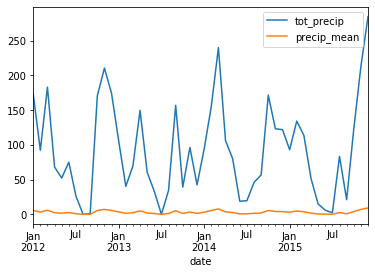

In [235]:
seawxm[['tot_precip', 'precip_mean']].plot()
plt.show()

- Visualize the amount of wind over time. Choose a time interval you think is
  appropriate.

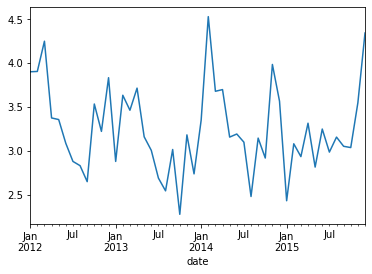

In [236]:
seawxm.wind_mean.plot()
plt.show()

- Which year-month combination is the windiest?

In [237]:
top_wind = seawxm.wind_mean.max()
seawind = seawxm[['tot_days', 'wind_mean']]
seawind = seawind[seawind.wind_mean == top_wind]

ifull(seawind)

,tot_days,wind_mean
date,,
2014-02-28,28,4.528571


- What's the sunniest year? (Hint: which day has the highest number of days
  where weather == sun?)

In [238]:
seasun=seawxm[['tot_days', 'sun_days']].resample('y').sum()
max_sun = seasun.sun_days.max()
seasun['sunniest']=seasun.sun_days.apply(lambda s: '<---' if s == max_sun else '')
ifull(seasun)

,tot_days,sun_days,sunniest
date,,,
2012-12-31,366,118.0,
2013-12-31,365,205.0,
2014-12-31,365,211.0,<---
2015-12-31,365,180.0,


- In which month does it rain the most?

In [242]:
#top_precip = seawxm.tot_precip.max()
#top_precip_mean = seawxm.precip_mean.max()
seaprecipm = seaprecip.tot_precip.groupby(seaprecip.index.strftime('%B')).sum()
#seaprecipest = seaprecip[(seaprecip.tot_precip == top_precip) | (seaprecip.precip_mean == top_precip_mean)]

ifull(seaprecipm)

April        375.4
August       163.7
December     622.7
February     422.0
January      466.0
July          48.2
June         132.9
March        606.2
May          207.5
November     642.5
October      503.4
September    235.5
Name: tot_precip, dtype: float64

- Which month has the most number of days with a non-zero amount of
  precipitation?

```python
    from vega_datasets import data
    data.flights_20k()
```

#### Use the dataset to answer the following questions:

- Convert any negative delays to 0.

- Which hour of the day has the highest average delay?

- Does the day of the week make a difference in the delay amount?

- Does the month make a difference in the delay amount?

```python
    from vega_datasets import data
    data.iowa_electricity()
```

#### Use the dataset to answer the following questions:

- For each row, calculate the percentage of the year's total that energy source
  provided.

- Lineplot of generation over time, color by source

- Display the data as table where years are columns, and energy source is rows
  (Hint: `df.pivot_table`)

- Make a line plot that shows the amount of energy generated over time. Each
  source should be a separate line?

- Is the total generation increasing over time?
    - How would you control for increasing consumption over time when
      considering how much energy is coming from each source?
    - express each number as a % of the year's total

```python
from vega_datasets import data
data.seattle_weather()
```

#### Use the dataset to answer the following questions:

1. Use the `sf_temps` dataset

2. Create 4 categories for temperature, cold, cool, warm, hot (hint: use
   `pd.cut` or `pd.qcut` for this)

3. How does the occurances of these 4 categories change month over month? i.e.
   how many days have each distinction? Visualize this and give the visual
   appropriate colors for each category.

4. Create pretty labels for time plots

5. Visualize the number of days of each month that fall into each bin by year
   (e.g. x=month, y=n_days, hue=temp_bin) or st similar